In [1]:
import pandas as pd

In [2]:
FAMILY = 'SPOUT'
PATCH_SIZE = 10
INPUT = f'/home/jovyan/data/proteins_m1/preds_{PATCH_SIZE}_{FAMILY.replace("/", "")}_minimums_reduced.csv'

THRESHOLD = 0.1  # significant drop -> only drops under this will be considered when extending the intervals and in the visualisations

In [3]:
from ast import literal_eval

df = pd.read_csv(INPUT)
df['patched_starts'] = df['patched_starts'].apply(lambda x: literal_eval(str(x)))
df['patched_preds'] = df['patched_preds'].apply(lambda x: literal_eval(str(x)))
df[f'patched_starts'] = df.apply(lambda row: [int(_) for _ in row[f'patched_starts']], axis = 1)
df[f'patched_preds'] = df.apply(lambda row: [float(_) for _ in row[f'patched_preds']], axis = 1)
df[f'seq_len'] = df.apply(lambda row: len(row['sequence_str']), axis = 1)
df

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end,overlap_pred,overlap_real,overlap,index,drop_difference,seq_len
0,A0A1F8ZSG3,MKLAIICVGRIKKDYIKAGVKEYLTRIKRYSPIEILEVKEETGRNI...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",117,0.296387,70,120,SPOUT,127,0.3,0.060000,0.052632,0,0.703613,155
1,A0A7M1Q6L6,MSGPRIHVAADFTVGGDVVLPEGPARHVARVLRLGEGAPVRLFDGA...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 0.99951171875, 0.99951171...",167,0.011566,167,213,SPOUT,177,1.0,0.217391,0.217391,1,0.988434,242
2,A0A087BLB3,MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFD...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",163,0.024170,159,202,SPOUT,173,1.0,0.232558,0.232558,2,0.975830,242
3,A0A353CQP5,MRVDVVTLFPELVDGPLSGSIVGRARSRGILELGFSNPREFAKDRH...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",107,0.029236,82,126,SPOUT,117,1.0,0.227273,0.227273,3,0.970764,220
4,A0A7Y0KPE4,MSEGLLTERTPRVAAARKLLRRAAREDTGRFLVEGVRPAHDAIARA...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",229,0.226196,196,240,SPOUT,239,1.0,0.227273,0.227273,4,0.773804,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,A0A0N8JX83,MLHFRFSGKEEKRKRKDAKVLKQLEKQRRKEEETKEQLRQESERKE...,0.999023,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.9990234375, 0.9990234375, 0.9990234375, 0.9...",286,0.989746,286,340,SPOUT,296,1.0,0.185185,0.185185,6814,0.009277,376
6783,A0A2E3TRC5,MSNAGRNSGTSSPKRGGGSSSRSSGRNGQKGRSGQQRGGSPSNGGR...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",272,0.209351,239,282,SPOUT,282,1.0,0.232558,0.232558,6815,0.790161,316
6784,A0A0R1SCE8,MEEKMTNHIVLFEPLMPANTGNIARTCAGTDTVLDLIEPLGFSIDD...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",121,0.132446,82,127,SPOUT,131,0.6,0.133333,0.122449,6817,0.867554,174
6785,A0A379BXK7,MSRGEKMEFTIQKSVELGVKVITPLWSERCGVKLDAERMAKKIQQW...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",104,0.012589,83,132,SPOUT,114,1.0,0.204082,0.204082,6818,0.987411,159


In [4]:
df = df.loc[df['min_pred'] <= THRESHOLD].copy()
df.reset_index(drop=True, inplace=True)
df

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end,overlap_pred,overlap_real,overlap,index,drop_difference,seq_len
0,A0A7M1Q6L6,MSGPRIHVAADFTVGGDVVLPEGPARHVARVLRLGEGAPVRLFDGA...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 0.99951171875, 0.99951171...",167,0.011566,167,213,SPOUT,177,1.0,0.217391,0.217391,1,0.988434,242
1,A0A087BLB3,MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFD...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",163,0.024170,159,202,SPOUT,173,1.0,0.232558,0.232558,2,0.975830,242
2,A0A353CQP5,MRVDVVTLFPELVDGPLSGSIVGRARSRGILELGFSNPREFAKDRH...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",107,0.029236,82,126,SPOUT,117,1.0,0.227273,0.227273,3,0.970764,220
3,A0A3D4ZWP2,MRFDVVTIFPNLITDAAAYGVLGRAIEQNLIQLAAHDLRDWCHDRY...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",109,0.062866,82,127,SPOUT,119,1.0,0.222222,0.222222,7,0.937134,237
4,A0A660VXZ4,MRQPATRAELQRLQRLGQARARRQAGELLVEGPRVLAEALIAGLVP...,0.998047,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.998046875, 0.998046875, 0.998046875, 0.9980...",238,0.007027,212,259,SPOUT,248,1.0,0.212766,0.212766,10,0.991020,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,A0A3T0S3A8,MPEPWPTDPRYDRELLRAGDRRNVIDRYRYWSVEAIVAELDTHRSP...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",144,0.008812,118,161,SPOUT,154,1.0,0.232558,0.232558,6801,0.991188,197
2968,A0A420WZH0,MSRSSSDRGRSSRSRPRRAREQGSGAGVPGAPRGLEPVFGVHAVEA...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",224,0.002350,205,246,SPOUT,234,1.0,0.243902,0.243902,6806,0.997162,281
2969,A0A383WFA6,MHQVRCAASHASTSSAAASSSSSPRLPAATDISSTANPYIKHCVKL...,0.998047,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.998046875, 0.99853515625, 0.998046875, 0.99...",294,0.013382,250,314,SPOUT,304,1.0,0.156250,0.156250,6808,0.984665,364
2970,A0A844QHH0,MNDDKKSGSAKDTHYARLRRAHRDRKAGGAAPRPRPSSGEPGSAPP...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",230,0.003143,211,252,SPOUT,240,1.0,0.243902,0.243902,6811,0.996368,284


In [5]:
# add ends for calculating of extended intervals:
df[f'patched_ends'] = df.apply(lambda row: [-1] + [int(_) + PATCH_SIZE for _ in row['patched_starts'][1:]], axis=1)
df

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end,overlap_pred,overlap_real,overlap,index,drop_difference,seq_len,patched_ends
0,A0A7M1Q6L6,MSGPRIHVAADFTVGGDVVLPEGPARHVARVLRLGEGAPVRLFDGA...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 0.99951171875, 0.99951171...",167,0.011566,167,213,SPOUT,177,1.0,0.217391,0.217391,1,0.988434,242,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."
1,A0A087BLB3,MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFD...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",163,0.024170,159,202,SPOUT,173,1.0,0.232558,0.232558,2,0.975830,242,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."
2,A0A353CQP5,MRVDVVTLFPELVDGPLSGSIVGRARSRGILELGFSNPREFAKDRH...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",107,0.029236,82,126,SPOUT,117,1.0,0.227273,0.227273,3,0.970764,220,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."
3,A0A3D4ZWP2,MRFDVVTIFPNLITDAAAYGVLGRAIEQNLIQLAAHDLRDWCHDRY...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",109,0.062866,82,127,SPOUT,119,1.0,0.222222,0.222222,7,0.937134,237,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."
4,A0A660VXZ4,MRQPATRAELQRLQRLGQARARRQAGELLVEGPRVLAEALIAGLVP...,0.998047,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.998046875, 0.998046875, 0.998046875, 0.9980...",238,0.007027,212,259,SPOUT,248,1.0,0.212766,0.212766,10,0.991020,292,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,A0A3T0S3A8,MPEPWPTDPRYDRELLRAGDRRNVIDRYRYWSVEAIVAELDTHRSP...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",144,0.008812,118,161,SPOUT,154,1.0,0.232558,0.232558,6801,0.991188,197,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."
2968,A0A420WZH0,MSRSSSDRGRSSRSRPRRAREQGSGAGVPGAPRGLEPVFGVHAVEA...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",224,0.002350,205,246,SPOUT,234,1.0,0.243902,0.243902,6806,0.997162,281,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."
2969,A0A383WFA6,MHQVRCAASHASTSSAAASSSSSPRLPAATDISSTANPYIKHCVKL...,0.998047,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.998046875, 0.99853515625, 0.998046875, 0.99...",294,0.013382,250,314,SPOUT,304,1.0,0.156250,0.156250,6808,0.984665,364,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."
2970,A0A844QHH0,MNDDKKSGSAKDTHYARLRRAHRDRKAGGAAPRPRPSSGEPGSAPP...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",230,0.003143,211,252,SPOUT,240,1.0,0.243902,0.243902,6811,0.996368,284,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2..."


In [6]:
# take all continuous intervals that result in prediction under some constant
def take_continuous_intervals(preds, starts, ends, threshold=THRESHOLD):
    intervals = []
    
    current_interval = (0, 0)
    save = False
    for i in range(len(preds)):
        if i == 0:
            continue
            
        if preds[i] < threshold:
            # make the interval bigger to the right
            if starts[i] <= current_interval[1] and save:
                current_interval = (current_interval[0], ends[i])
            else:
                # start creating new interval
                current_interval = (starts[i], ends[i])
            save = True
        else:
            if save:
                intervals.append(current_interval)
            current_interval = (starts[i], ends[i])
            save = False
            
        # save the interval in case we are at the end of the list
        if save and i == len(preds)-1:
            intervals.append(current_interval)
    
    return intervals


def join_continuous_intervals(intervals):
    if len(intervals) == 0:
        return []
    
    new_intervals = [intervals[0]]
    cur_index = 0
    for i in range(1, len(intervals)):
        if new_intervals[cur_index][1] >= intervals[i][0]:
            new_intervals[cur_index] = (new_intervals[cur_index][0], intervals[i][1])
        else:
            new_intervals.append(intervals[i])
            cur_index += 1
    return new_intervals


df[f'extended_intervals'] = df.apply(lambda row: take_continuous_intervals(row[f'patched_preds'], row[f'patched_starts'], row[f'patched_ends']), axis=1)
df[f'extended_intervals_simple'] = df.apply(lambda row: join_continuous_intervals(row[f'extended_intervals']), axis=1)
df

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end,overlap_pred,overlap_real,overlap,index,drop_difference,seq_len,patched_ends,extended_intervals,extended_intervals_simple
0,A0A7M1Q6L6,MSGPRIHVAADFTVGGDVVLPEGPARHVARVLRLGEGAPVRLFDGA...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 0.99951171875, 0.99951171...",167,0.011566,167,213,SPOUT,177,1.0,0.217391,0.217391,1,0.988434,242,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(162, 172), (164, 179), (208, 218)]","[(162, 179), (208, 218)]"
1,A0A087BLB3,MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFD...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",163,0.024170,159,202,SPOUT,173,1.0,0.232558,0.232558,2,0.975830,242,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(163, 173), (167, 177), (189, 199)]","[(163, 177), (189, 199)]"
2,A0A353CQP5,MRVDVVTLFPELVDGPLSGSIVGRARSRGILELGFSNPREFAKDRH...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",107,0.029236,82,126,SPOUT,117,1.0,0.227273,0.227273,3,0.970764,220,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(87, 97), (106, 117), (109, 119), (112, 122)]","[(87, 97), (106, 122)]"
3,A0A3D4ZWP2,MRFDVVTIFPNLITDAAAYGVLGRAIEQNLIQLAAHDLRDWCHDRY...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",109,0.062866,82,127,SPOUT,119,1.0,0.222222,0.222222,7,0.937134,237,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(104, 114), (109, 119)]","[(104, 119)]"
4,A0A660VXZ4,MRQPATRAELQRLQRLGQARARRQAGELLVEGPRVLAEALIAGLVP...,0.998047,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.998046875, 0.998046875, 0.998046875, 0.9980...",238,0.007027,212,259,SPOUT,248,1.0,0.212766,0.212766,10,0.991020,292,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(238, 252), (258, 269)]","[(238, 252), (258, 269)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,A0A3T0S3A8,MPEPWPTDPRYDRELLRAGDRRNVIDRYRYWSVEAIVAELDTHRSP...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",144,0.008812,118,161,SPOUT,154,1.0,0.232558,0.232558,6801,0.991188,197,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(115, 125), (117, 127), (140, 150), (143, 157...","[(115, 127), (140, 164)]"
2968,A0A420WZH0,MSRSSSDRGRSSRSRPRRAREQGSGAGVPGAPRGLEPVFGVHAVEA...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",224,0.002350,205,246,SPOUT,234,1.0,0.243902,0.243902,6806,0.997162,281,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(222, 235)]","[(222, 235)]"
2969,A0A383WFA6,MHQVRCAASHASTSSAAASSSSSPRLPAATDISSTANPYIKHCVKL...,0.998047,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.998046875, 0.99853515625, 0.998046875, 0.99...",294,0.013382,250,314,SPOUT,304,1.0,0.156250,0.156250,6808,0.984665,364,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(294, 304)]","[(294, 304)]"
2970,A0A844QHH0,MNDDKKSGSAKDTHYARLRRAHRDRKAGGAAPRPRPSSGEPGSAPP...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",230,0.003143,211,252,SPOUT,240,1.0,0.243902,0.243902,6811,0.996368,284,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(228, 241), (241, 251), (246, 256), (248, 258)]","[(228, 258)]"


In [7]:
# https://stackoverflow.com/questions/2953967/built-in-function-for-computing-overlap-in-python

# what percentage of the predicted interval is actually in the knot core: 
def calculate_score_overlap_wrt_predicted(x_start, x_end, y_start, y_end):
    predicted_len = (x_end - x_start) if (x_end - x_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / predicted_len

# what percentage of the actual knot core was found based on the prediction:
def calculate_score_overlap_wrt_real(x_start, x_end, y_start, y_end):
    real_len = (y_end - y_start) if (y_end - y_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / real_len


# https://www.reddit.com/r/datascience/comments/vqtac5/metric_or_measure_of_how_well_two_time_intervals/

# intersection over union:
def calculate_score_overlap(x_start, x_end, y_start, y_end):
    intersection = min(x_end, y_end)-max(x_start, y_start)
    union = max(x_end, y_end) - min(x_start, y_start)
    return intersection/union if union > 0 else 0

In [8]:
df['extended_overlap_pred'] = df.apply(lambda row: [calculate_score_overlap_wrt_predicted(_[0], _[1], row['knot_start'], row['knot_end']) for _ in row['extended_intervals_simple']], axis=1)
df['extended_overlap_pred'] = df.apply(lambda row: (sum(row['extended_overlap_pred']) / len(row['extended_intervals_simple'])) if len(row['extended_intervals_simple']) > 0 else 0.0, axis=1)  # normalised by the number of patches
df['extended_overlap_real'] = df.apply(lambda row: [calculate_score_overlap_wrt_real(_[0], _[1], row['knot_start'], row['knot_end']) for _ in row['extended_intervals_simple']], axis=1)
df['extended_overlap_real'] = df.apply(lambda row: sum(row['extended_overlap_real']), axis=1)
df['extended_overlap'] = df.apply(lambda row: [calculate_score_overlap(_[0], _[1], row['knot_start'], row['knot_end']) for _ in row['extended_intervals_simple']], axis=1)
df['extended_overlap'] = df.apply(lambda row: sum(row['extended_overlap']), axis=1)
df

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,...,overlap,index,drop_difference,seq_len,patched_ends,extended_intervals,extended_intervals_simple,extended_overlap_pred,extended_overlap_real,extended_overlap
0,A0A7M1Q6L6,MSGPRIHVAADFTVGGDVVLPEGPARHVARVLRLGEGAPVRLFDGA...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 0.99951171875, 0.99951171...",167,0.011566,167,213,SPOUT,...,0.217391,1,0.988434,242,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(162, 172), (164, 179), (208, 218)]","[(162, 179), (208, 218)]",0.602941,0.369565,0.333333
1,A0A087BLB3,MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFD...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",163,0.024170,159,202,SPOUT,...,0.232558,2,0.975830,242,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(163, 173), (167, 177), (189, 199)]","[(163, 177), (189, 199)]",1.000000,0.558140,0.558140
2,A0A353CQP5,MRVDVVTLFPELVDGPLSGSIVGRARSRGILELGFSNPREFAKDRH...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",107,0.029236,82,126,SPOUT,...,0.227273,3,0.970764,220,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(87, 97), (106, 117), (109, 119), (112, 122)]","[(87, 97), (106, 122)]",1.000000,0.590909,0.590909
3,A0A3D4ZWP2,MRFDVVTIFPNLITDAAAYGVLGRAIEQNLIQLAAHDLRDWCHDRY...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",109,0.062866,82,127,SPOUT,...,0.222222,7,0.937134,237,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(104, 114), (109, 119)]","[(104, 119)]",1.000000,0.333333,0.333333
4,A0A660VXZ4,MRQPATRAELQRLQRLGQARARRQAGELLVEGPRVLAEALIAGLVP...,0.998047,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.998046875, 0.998046875, 0.998046875, 0.9980...",238,0.007027,212,259,SPOUT,...,0.212766,10,0.991020,292,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(238, 252), (258, 269)]","[(238, 252), (258, 269)]",0.545455,0.319149,0.315416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,A0A3T0S3A8,MPEPWPTDPRYDRELLRAGDRRNVIDRYRYWSVEAIVAELDTHRSP...,1.000000,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",144,0.008812,118,161,SPOUT,...,0.232558,6801,0.991188,197,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(115, 125), (117, 127), (140, 150), (143, 157...","[(115, 127), (140, 164)]",0.812500,0.697674,0.652174
2968,A0A420WZH0,MSRSSSDRGRSSRSRPRRAREQGSGAGVPGAPRGLEPVFGVHAVEA...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",224,0.002350,205,246,SPOUT,...,0.243902,6806,0.997162,281,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(222, 235)]","[(222, 235)]",1.000000,0.317073,0.317073
2969,A0A383WFA6,MHQVRCAASHASTSSAAASSSSSPRLPAATDISSTANPYIKHCVKL...,0.998047,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.998046875, 0.99853515625, 0.998046875, 0.99...",294,0.013382,250,314,SPOUT,...,0.156250,6808,0.984665,364,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(294, 304)]","[(294, 304)]",1.000000,0.156250,0.156250
2970,A0A844QHH0,MNDDKKSGSAKDTHYARLRRAHRDRKAGGAAPRPRPSSGEPGSAPP...,0.999512,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[0.99951171875, 0.99951171875, 0.99951171875, ...",230,0.003143,211,252,SPOUT,...,0.243902,6811,0.996368,284,"[-1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2...","[(228, 241), (241, 251), (246, 256), (248, 258)]","[(228, 258)]",0.800000,0.585366,0.510638


Knot core is highligted in green and the patch is blue (if they do not overlap, the patch is yellow).

--------------------------------------------------------------------------------
Sequence A0A087BLB3 (i=1) with len=242:
RAW pred: 1.0 (159, 202), Overall MIN pred: 0.024169921875 (163, 173)

MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFDPRIDSGLLDEGDRRNVVDRYRYWTVDAIRDDLDARGRHHFEVAVENWSHDFNIGSVVRTANAFATNRVHIVGPRKWNRRGSLMTELYQHVDHMPSIAALGDWWRREYPTAPIIALDIIPGAVPIETYEFPDRCLMLFGAEGPGLSRNALDLADDVVYISQFGSVRSINAGAAAAVAMHCWVTQHGGNQRPAPAARR (163, 173)

MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFDPRIDSGLLDEGDRRNVVDRYRYWTVDAIRDDLDARGRHHFEVAVENWSHDFNIGSVVRTANAFATNRVHIVGPRKWNRRGSLMTELYQHVDHMPSIAALGDWWRREYPTAPIIALDIIPGAVPIETYEFPDRCLMLFGAEGPGLSRNALDLADDVVYISQFGSVRSINAGAAAAVAMHCWVTQHGGNQRPAPAARR (163, 177)
MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFDPRIDSGLLDEGDRRNVVDRYRYWTVDAIRDDLDARGRHHFEVAVENWSHDFNIGSVVRTANAFATNRVHIVGPRKWNRRGSLMTELYQHVDHMPSIAALGDWWRREYPTAPIIALDIIPGAVPIETYEFPDRCLMLFGAEGPGLSRNALD

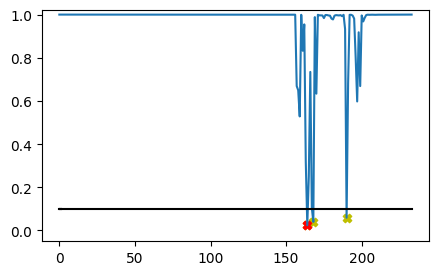

3

In [9]:
import matplotlib.pyplot as plt
from termcolor import colored


# https://stackoverflow.com/questions/16816013/is-it-possible-to-print-using-different-colors-in-ipythons-notebook
def format_seq_str(seq_str, knot_start, knot_end, patch_start, patch_end):
    # there are multiple cases, go over each:
    # a) no overlap, patch on left:    SSPPSKKKKSSSSS
    if (patch_start <= knot_start) & (patch_end <= knot_start):
        return seq_str[:patch_start] + colored(seq_str[patch_start:patch_end], 'yellow') + seq_str[patch_end:knot_start] + colored(seq_str[knot_start:knot_end], 'green') + seq_str[knot_end:]
    # b) overlap from left:            SSPPSKKKKSSSSS
    elif (patch_start <= knot_start) & (patch_end <= knot_end):
        return seq_str[:patch_start] + colored(seq_str[patch_start:knot_start], 'yellow') + colored(seq_str[knot_start:patch_end], 'blue') + colored(seq_str[patch_end:knot_end], 'green') + seq_str[knot_end:]
    # c) entire overlap:               SSSSSKPPKSSSSS
    elif (knot_start <= patch_start) & (knot_end >= patch_end):
        return seq_str[:knot_start] + colored(seq_str[knot_start:patch_start], 'green') + colored(seq_str[patch_start:patch_end], 'blue') + colored(seq_str[patch_end:knot_end], 'green') + seq_str[knot_end:]
    # c2) entire overlap, bigger patch: SSSSSKPPKSSSSS
    elif (patch_start <= knot_start) & (patch_end >= knot_end):
        return seq_str[:patch_start] + colored(seq_str[patch_start:knot_start], 'yellow') + colored(seq_str[knot_start:knot_end], 'blue') + colored(seq_str[knot_end:patch_end], 'yellow') + seq_str[patch_end:]
    # d) no overlap, patch on right:   SSSSSKKKKSSPPS
    elif (patch_start >= knot_end):
        return seq_str[:knot_start] + colored(seq_str[knot_start:knot_end], 'green') + seq_str[knot_end:patch_start] + colored(seq_str[patch_start:patch_end], 'yellow') + seq_str[patch_end:]
    # e) overlap from right:           SSSSSKKKPPSSSS
    elif (knot_start <= patch_start) & (knot_end <= patch_end):
        return seq_str[:knot_start] + colored(seq_str[knot_start:patch_start], 'green') + colored(seq_str[patch_start:knot_end], 'blue') + colored(seq_str[knot_end:patch_end], 'yellow') + seq_str[patch_end:]
    else:
        return 'Error in boundaries'
    
    
def plot_preds(preds_list, min_index, min_value):
    # https://stackoverflow.com/questions/74013277/count-number-of-peaks-when-using-pyplot
    positions = pd.DataFrame([_ for _ in range(len(preds_list))], columns=['position'])
    positions['prediction'] = preds_list
    peaks = positions[positions['prediction'] < THRESHOLD]
    plt.rcParams['figure.figsize'] = (5, 3)
    plt.plot(positions['position'], positions['prediction'])
    plt.plot(positions, [THRESHOLD] * len(positions), c='k')
    plt.scatter(peaks.index, peaks['prediction'], c='y', marker='X') # marker: red cross
    plt.scatter(min_index+1, min_value, c='r', marker='X') # marker: red cross
    plt.ylim([-0.05, 1.02])
    plt.show()
    return len(peaks)
    

def visualise_seq(df, seq_id):
    sample = df.loc[seq_id]
    print('-' * 80)
    # info about the original seq and its overall minimum:
    print(f'Sequence {sample["id"]} (i={seq_id}) with len={sample["seq_len"]}:')
    print(f'RAW pred: {sample["sequence_pred"]} ({sample["knot_start"]}, {sample["knot_end"]}), Overall MIN pred: {sample["min_pred"]} ({sample["min_start"]}, {sample["min_end"]})\n')
    print(f'{format_seq_str(sample["sequence_str"], sample["knot_start"], sample["knot_end"], sample["min_start"], sample["min_end"])} ({sample["min_start"]}, {sample["min_end"]})\n')
    
    # each extended interval visualised:
    intervals = sample['extended_intervals_simple']
    for interval in intervals:
        print(f'{format_seq_str(sample["sequence_str"], sample["knot_start"], sample["knot_end"], interval[0], interval[1])} ({interval[0]}, {interval[1]})')
        
    # stats of extended compared to overall minimum:
    print()
    print(f'MIN vs. sum EXTENDED')
    print(f'{sample["overlap_pred"]:.4} vs. {sample["extended_overlap_pred"]:.4}')
    print(f'{sample["overlap_real"]:.4} vs. {sample["extended_overlap_real"]:.4}')
    print(f'{sample["overlap"]:.4} vs. {sample["extended_overlap"]:.4}')
    
    return plot_preds(sample['patched_preds'], sample['min_start'], sample['min_pred'])
    

print(f'Knot core is highligted in {colored("green", "green")} and the patch is {colored("blue", "blue")} (if they do not overlap, the patch is {colored("yellow", "yellow")}).\n')
visualise_seq(df, 1)

--------------------------------------------------------------------------------
Sequence A0A7M1Q6L6 (i=0) with len=242:
RAW pred: 1.0 (167, 213), Overall MIN pred: 0.011566162109375 (167, 177)

MSGPRIHVAADFTVGGDVVLPEGPARHVARVLRLGEGAPVRLFDGAGHEARAVIVEASRKRVVVCIESVEAGRGESPLAVHLGQAISKGDRMDYAIQKAVELGVAAITPLYTEHGDVRLKGEREAKKLAHWQAVAASACEQCGRAVVPVVHTPSTLHEWLGERGEMLRLVLHPGTAGALEQDVAPASAALLIGPEGGLADSEVEAAMACDFSLLSLGPRILRTETAPVVALSLLQYRFGDLG (167, 177)

MSGPRIHVAADFTVGGDVVLPEGPARHVARVLRLGEGAPVRLFDGAGHEARAVIVEASRKRVVVCIESVEAGRGESPLAVHLGQAISKGDRMDYAIQKAVELGVAAITPLYTEHGDVRLKGEREAKKLAHWQAVAASACEQCGRAVVPVVHTPSTLHEWLGERGEMLRLVLHPGTAGALEQDVAPASAALLIGPEGGLADSEVEAAMACDFSLLSLGPRILRTETAPVVALSLLQYRFGDLG (162, 179)
MSGPRIHVAADFTVGGDVVLPEGPARHVARVLRLGEGAPVRLFDGAGHEARAVIVEASRKRVVVCIESVEAGRGESPLAVHLGQAISKGDRMDYAIQKAVELGVAAITPLYTEHGDVRLKGEREAKKLAHWQAVAASACEQCGRAVVPVVHTPSTLHEWLGERGEMLRLVLHPGTAGALEQDVAPASAALLIGPEGGLADSEVEAAMACDFSLLSLGPRILRTETAPVVALSLLQYRFGDLG (208, 218)

MIN vs. sum EXTENDED
1.0 vs. 0.6029
0.217

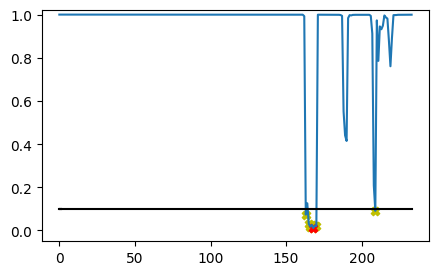

--------------------------------------------------------------------------------
Sequence A0A087BLB3 (i=1) with len=242:
RAW pred: 1.0 (159, 202), Overall MIN pred: 0.024169921875 (163, 173)

MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFDPRIDSGLLDEGDRRNVVDRYRYWTVDAIRDDLDARGRHHFEVAVENWSHDFNIGSVVRTANAFATNRVHIVGPRKWNRRGSLMTELYQHVDHMPSIAALGDWWRREYPTAPIIALDIIPGAVPIETYEFPDRCLMLFGAEGPGLSRNALDLADDVVYISQFGSVRSINAGAAAAVAMHCWVTQHGGNQRPAPAARR (163, 173)

MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFDPRIDSGLLDEGDRRNVVDRYRYWTVDAIRDDLDARGRHHFEVAVENWSHDFNIGSVVRTANAFATNRVHIVGPRKWNRRGSLMTELYQHVDHMPSIAALGDWWRREYPTAPIIALDIIPGAVPIETYEFPDRCLMLFGAEGPGLSRNALDLADDVVYISQFGSVRSINAGAAAAVAMHCWVTQHGGNQRPAPAARR (163, 177)
MHEPDPVTVAARASGEPDLRIVGVGPWAQEHPGEPRPDDPESPGFDPRIDSGLLDEGDRRNVVDRYRYWTVDAIRDDLDARGRHHFEVAVENWSHDFNIGSVVRTANAFATNRVHIVGPRKWNRRGSLMTELYQHVDHMPSIAALGDWWRREYPTAPIIALDIIPGAVPIETYEFPDRCLMLFGAEGPGLSRNALDLADDVVYISQFGSVRSINAGAAAAVAMHCWVTQHGGNQRPAPAARR (189, 199)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2326 vs. 

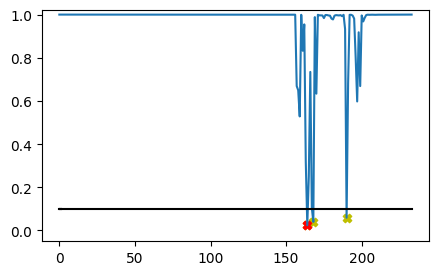

--------------------------------------------------------------------------------
Sequence A0A353CQP5 (i=2) with len=220:
RAW pred: 1.0 (82, 126), Overall MIN pred: 0.02923583984375 (107, 117)

MRVDVVTLFPELVDGPLSGSIVGRARSRGILELGFSNPREFAKDRHRTVDDRPYGGGPGMLMMAEPLCQAIRAVKKRGSKVIFLTPRGRKFDQRLARELSKEKRLVLVCGHYEGVDERAHSLADDEISLGDFVLTGGEPAAVAVIDALTRLLPGTLKKADAAEKESFTEPLLEAPQYTRPAVWRGKKVPAVLMSGDHAAIEAWRAKEALKLTKKNRPDLL (107, 117)

MRVDVVTLFPELVDGPLSGSIVGRARSRGILELGFSNPREFAKDRHRTVDDRPYGGGPGMLMMAEPLCQAIRAVKKRGSKVIFLTPRGRKFDQRLARELSKEKRLVLVCGHYEGVDERAHSLADDEISLGDFVLTGGEPAAVAVIDALTRLLPGTLKKADAAEKESFTEPLLEAPQYTRPAVWRGKKVPAVLMSGDHAAIEAWRAKEALKLTKKNRPDLL (87, 97)
MRVDVVTLFPELVDGPLSGSIVGRARSRGILELGFSNPREFAKDRHRTVDDRPYGGGPGMLMMAEPLCQAIRAVKKRGSKVIFLTPRGRKFDQRLARELSKEKRLVLVCGHYEGVDERAHSLADDEISLGDFVLTGGEPAAVAVIDALTRLLPGTLKKADAAEKESFTEPLLEAPQYTRPAVWRGKKVPAVLMSGDHAAIEAWRAKEALKLTKKNRPDLL (106, 122)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2273 vs. 0.5909
0.2273 vs. 0.5909


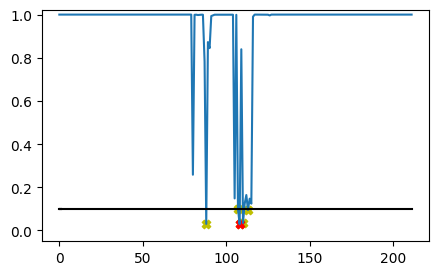

--------------------------------------------------------------------------------
Sequence A0A3D4ZWP2 (i=3) with len=237:
RAW pred: 1.0 (82, 127), Overall MIN pred: 0.0628662109375 (109, 119)

MRFDVVTIFPNLITDAAAYGVLGRAIEQNLIQLAAHDLRDWCHDRYRQVDDTPYGGGPGMVMKPEPFFEAVEQLRGDKSHVVLLSPQGQLLNHGLARSLSECEHLILLCGRYEGVDERVRSALVDQEVSVGDYVLSGGEFAALVLLDSVSRLVDGVLGNDTSVDQESHTQNLLEYPQYTRPAQYRSMAVPVDLAEGHHEQIRLWRRREALRRTLERRPDLLARAALTDEDWRLLGEL (109, 119)

MRFDVVTIFPNLITDAAAYGVLGRAIEQNLIQLAAHDLRDWCHDRYRQVDDTPYGGGPGMVMKPEPFFEAVEQLRGDKSHVVLLSPQGQLLNHGLARSLSECEHLILLCGRYEGVDERVRSALVDQEVSVGDYVLSGGEFAALVLLDSVSRLVDGVLGNDTSVDQESHTQNLLEYPQYTRPAQYRSMAVPVDLAEGHHEQIRLWRRREALRRTLERRPDLLARAALTDEDWRLLGEL (104, 119)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2222 vs. 0.3333
0.2222 vs. 0.3333


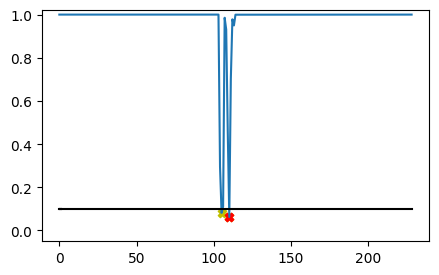

--------------------------------------------------------------------------------
Sequence A0A660VXZ4 (i=4) with len=292:
RAW pred: 0.9980469 (212, 259), Overall MIN pred: 0.0070266723632812 (238, 248)

MRQPATRAELQRLQRLGQARARRQAGELLVEGPRVLAEALIAGLVPSLVAVSERAAETHAELLTAVEAAGAPVRVADAERLARAADAAHGPGLLAAVPMPAAPEAGPQSEAGPQSEAGPAQGPGLTPLQTRSGARLELALAGLQDPGNVGTLVRSARGFAAGCVYLTPGTADPWSPKALRASAGAALHMPLRREAELSALAARAASHQLTLLVASAAAPDSPGPGPGPGAGPVTELPARCLLVLGHETRGVPELPAAAAVAVPQRPELESLNVAMAGSILMAGWYARCGSTS (238, 248)

MRQPATRAELQRLQRLGQARARRQAGELLVEGPRVLAEALIAGLVPSLVAVSERAAETHAELLTAVEAAGAPVRVADAERLARAADAAHGPGLLAAVPMPAAPEAGPQSEAGPQSEAGPAQGPGLTPLQTRSGARLELALAGLQDPGNVGTLVRSARGFAAGCVYLTPGTADPWSPKALRASAGAALHMPLRREAELSALAARAASHQLTLLVASAAAPDSPGPGPGPGAGPVTELPARCLLVLGHETRGVPELPAAAAVAVPQRPELESLNVAMAGSILMAGWYARCGSTS (238, 252)
MRQPATRAELQRLQRLGQARARRQAGELLVEGPRVLAEALIAGLVPSLVAVSERAAETHAELLTAVEAAGAPVRVADAERLARAADAAHGPGLLAAVPMPAAPEAGPQSEAGPQSEAGPAQGPGLTPLQTRSGARLELALAGLQDPGNVGTLVRSARGFAAGCVYLTPGTADPWSPKALRASAGAALHM

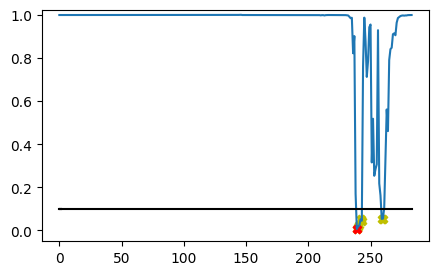

--------------------------------------------------------------------------------
Sequence A0A2E8N9E8 (i=5) with len=328:
RAW pred: 0.9995117 (256, 298), Overall MIN pred: 0.0082168579101562 (276, 286)

MSPPKGPRGQGGGRGSGKGRGSKPGTPGPPGSARQGVGKGGRGGPARRGPGGRPGNREGQRGTTPRGNRSGPSGAQKGQQKGLGGDQVEGRQAVRELLLAGTRKVREVVLAGDLDPAPILDDIIDLADEAKVTLREVSRNRFENLSRTDAPQGVLAMAQPLREYEFEDLLAPDATGRDPFLLLLDGVTDPGNLGAILRSAECAGVTGVVLPRHRAAGVTATVAKSAAGAIEHLRMTRVAGLPKALGRLSSAGVWSVGLDAGGDTPIHRLAVSDQPVALVMGAEGAGLSRLVRERCDAMAHIPLAGVLGSLNVSAAAAIALFEVARHRA (276, 286)

MSPPKGPRGQGGGRGSGKGRGSKPGTPGPPGSARQGVGKGGRGGPARRGPGGRPGNREGQRGTTPRGNRSGPSGAQKGQQKGLGGDQVEGRQAVRELLLAGTRKVREVVLAGDLDPAPILDDIIDLADEAKVTLREVSRNRFENLSRTDAPQGVLAMAQPLREYEFEDLLAPDATGRDPFLLLLDGVTDPGNLGAILRSAECAGVTGVVLPRHRAAGVTATVAKSAAGAIEHLRMTRVAGLPKALGRLSSAGVWSVGLDAGGDTPIHRLAVSDQPVALVMGAEGAGLSRLVRERCDAMAHIPLAGVLGSLNVSAAAAIALFEVARHRA (276, 286)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2381 vs. 0.2381
0.2381 vs. 0.2381


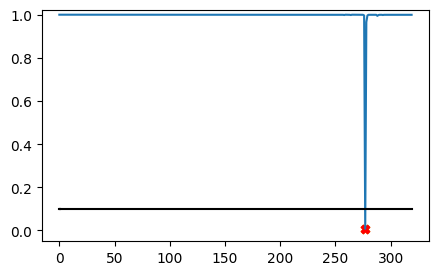

--------------------------------------------------------------------------------
Sequence A0A5C6X630 (i=6) with len=256:
RAW pred: 1.0 (173, 227), Overall MIN pred: 0.07122802734375 (203, 213)

MRRVPLAPERFDALDTPAQRERFSLPAEAAHYVRTVLRLAAGARIELFDGSGRLARATLITSAADEVIAEVEPPRVSERGESSVEWVLFQAIPKGDRWEWLLEKATELGVDAIVPLTTRRGVVQLSEDRFEKKRARWEKIIAGAARQCRRAKIPTLHSPLTPSRALSDHPCDTYLVAHLGEGMTGVQQALDQRASEGDAIARAGLWVGPEGGFEDAEVDAILNAGGTPITLGPRVLRAETAGITLLTLAQNALGEL (203, 213)

MRRVPLAPERFDALDTPAQRERFSLPAEAAHYVRTVLRLAAGARIELFDGSGRLARATLITSAADEVIAEVEPPRVSERGESSVEWVLFQAIPKGDRWEWLLEKATELGVDAIVPLTTRRGVVQLSEDRFEKKRARWEKIIAGAARQCRRAKIPTLHSPLTPSRALSDHPCDTYLVAHLGEGMTGVQQALDQRASEGDAIARAGLWVGPEGGFEDAEVDAILNAGGTPITLGPRVLRAETAGITLLTLAQNALGEL (203, 213)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.1852 vs. 0.1852
0.1852 vs. 0.1852


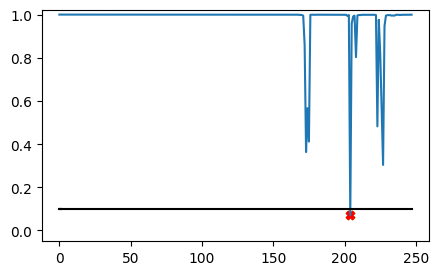

--------------------------------------------------------------------------------
Sequence A0A2K8MNT5 (i=7) with len=258:
RAW pred: 0.9995117 (180, 222), Overall MIN pred: 0.0142898559570312 (200, 210)

MAKPSYFYGIHAVQSILQHRGIDGLTLFIQDGKKQDDATVANITELAQTYGIAIQISGKDKLTKLAESPQHQGVVLQARPAELQDEADLKYLVDKHQAERKPLLLLVLDQITDPNNLGACLRTAVAMGVSAVIIPKNHSSSITPAVAKVAVGAVELMPFIQVTNLARTLTDIKRQGVFVFGTALYDTAKPVQDCDLTGDVAIVMGSEGEGIRRLTADTCDQLVYIPMPGNEHGQIQSLNVSVATGMVLYEASRQRSRK (200, 210)

MAKPSYFYGIHAVQSILQHRGIDGLTLFIQDGKKQDDATVANITELAQTYGIAIQISGKDKLTKLAESPQHQGVVLQARPAELQDEADLKYLVDKHQAERKPLLLLVLDQITDPNNLGACLRTAVAMGVSAVIIPKNHSSSITPAVAKVAVGAVELMPFIQVTNLARTLTDIKRQGVFVFGTALYDTAKPVQDCDLTGDVAIVMGSEGEGIRRLTADTCDQLVYIPMPGNEHGQIQSLNVSVATGMVLYEASRQRSRK (198, 211)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2381 vs. 0.3095
0.2381 vs. 0.3095


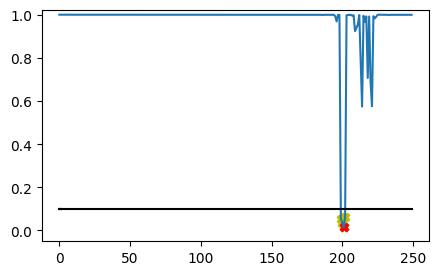

--------------------------------------------------------------------------------
Sequence A0A1M5RJX8 (i=8) with len=237:
RAW pred: 1.0 (161, 209), Overall MIN pred: 0.0144271850585937 (184, 194)

MYRFFEESKFQDSINLSPKNSHHFLKVLRIGEREKVEVCANNGIFLAELQEVEENIVILKKISEVEPKNESKIKITLFQAILKGDKMDQALKQATEVGVSEIYPLILKRNVANIEQKSDKKVQRWQKVVEAAAKQSKRDFIPKVNSPINLKNLIDNFKMKDLIVPYESEENKTLYDLKNLSSDIALVIGSEGGFEESEIELLKANGANIITLGNRILRAETAAVCSSFSIIYYLESR (184, 194)

MYRFFEESKFQDSINLSPKNSHHFLKVLRIGEREKVEVCANNGIFLAELQEVEENIVILKKISEVEPKNESKIKITLFQAILKGDKMDQALKQATEVGVSEIYPLILKRNVANIEQKSDKKVQRWQKVVEAAAKQSKRDFIPKVNSPINLKNLIDNFKMKDLIVPYESEENKTLYDLKNLSSDIALVIGSEGGFEESEIELLKANGANIITLGNRILRAETAAVCSSFSIIYYLESR (184, 194)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2083 vs. 0.2083
0.2083 vs. 0.2083


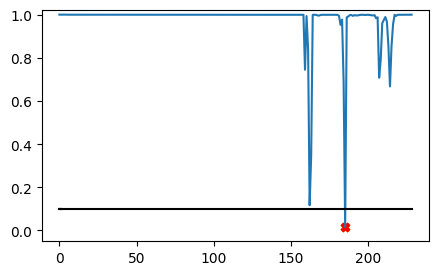

--------------------------------------------------------------------------------
Sequence A0A2E8AAC2 (i=9) with len=290:
RAW pred: 0.9995117 (212, 261), Overall MIN pred: 0.0023136138916015 (235, 245)

MKAPIYVPASRFIFQRQGEGSYQWWRSGVGQGRIDSPSIPSSLAFNELNLLLLPKKVRSLIFEPNDLKCIHLRKVLRVKEGQLVDLAVRNGPYGKGRVTLRKDESIELQIEWASDHSNDLYPISLVVGMSRPQTCRKILDQATSLGVSSFSFFQADNSEASYKQSSLWKSGEWISKIEGGVEQAFASYVPKCYRFSNLKEALSEEAKLGNRKLLALDNYEANQNLGVDTQSTAQGISLCVGPERGWSKQERQFLNAQNYQLRHLGPRVLRVETAVVSALGVLVSSFWEKD (235, 245)

MKAPIYVPASRFIFQRQGEGSYQWWRSGVGQGRIDSPSIPSSLAFNELNLLLLPKKVRSLIFEPNDLKCIHLRKVLRVKEGQLVDLAVRNGPYGKGRVTLRKDESIELQIEWASDHSNDLYPISLVVGMSRPQTCRKILDQATSLGVSSFSFFQADNSEASYKQSSLWKSGEWISKIEGGVEQAFASYVPKCYRFSNLKEALSEEAKLGNRKLLALDNYEANQNLGVDTQSTAQGISLCVGPERGWSKQERQFLNAQNYQLRHLGPRVLRVETAVVSALGVLVSSFWEKD (235, 247)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2041 vs. 0.2449
0.2041 vs. 0.2449


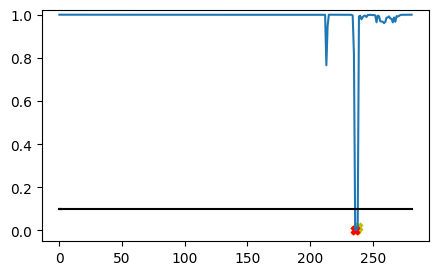

--------------------------------------------------------------------------------
Sequence A0A847LWE4 (i=10) with len=221:
RAW pred: 1.0 (81, 126), Overall MIN pred: 0.0075035095214843 (108, 118)

MKINVITLIPELYDTYFNFSVFYNALKDGIFSYELKNLRDFGLGIHKKVDDYPYGGGKGMILRVEPLVNCLNSFEEKGRVIFFSPAGRKLDISIIKEYAKLSTITIVNGRYEGVDERFIDNYVDDVISIGDFILTGGDPAALTFIDALLRHVPGFLDKEALLIESFEENLLEYPQYTRPEIFEGLKVPEILLSGNHEQIKKWRDQKRIEFTLKHRPDLINK (108, 118)

MKINVITLIPELYDTYFNFSVFYNALKDGIFSYELKNLRDFGLGIHKKVDDYPYGGGKGMILRVEPLVNCLNSFEEKGRVIFFSPAGRKLDISIIKEYAKLSTITIVNGRYEGVDERFIDNYVDDVISIGDFILTGGDPAALTFIDALLRHVPGFLDKEALLIESFEENLLEYPQYTRPEIFEGLKVPEILLSGNHEQIKKWRDQKRIEFTLKHRPDLINK (108, 121)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2222 vs. 0.2889
0.2222 vs. 0.2889


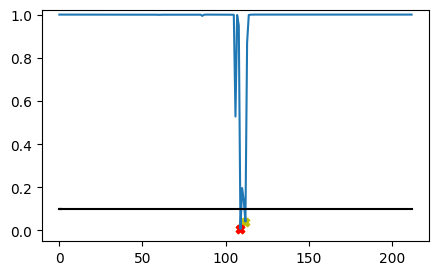

--------------------------------------------------------------------------------
Sequence A0A352CJ97 (i=11) with len=194:
RAW pred: 1.0 (96, 138), Overall MIN pred: 0.064208984375 (127, 137)

MTPERLHKLTEVLKKRQIDITIVLENVFDPHNISAVMRTCDAVGIQEIHILNTRIPRHKKWGARSSSSAAKWLTIHQYEEVDACFSKLRKDYGRILTTHLASDAVPLHALDLTQSVALVFGNEHSGVSDEIRSLADGNFMIPQVGIIQSLNISVACAVTLYEAFRQKELAGHYQRLDLDHPTKKQVRADWELPL (127, 137)

MTPERLHKLTEVLKKRQIDITIVLENVFDPHNISAVMRTCDAVGIQEIHILNTRIPRHKKWGARSSSSAAKWLTIHQYEEVDACFSKLRKDYGRILTTHLASDAVPLHALDLTQSVALVFGNEHSGVSDEIRSLADGNFMIPQVGIIQSLNISVACAVTLYEAFRQKELAGHYQRLDLDHPTKKQVRADWELPL (127, 145)

MIN vs. sum EXTENDED
1.0 vs. 0.6111
0.2381 vs. 0.2619
0.2381 vs. 0.2245


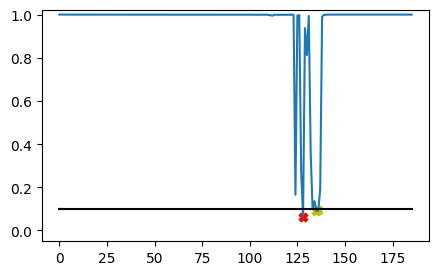

--------------------------------------------------------------------------------
Sequence A0A661BYL8 (i=12) with len=180:
RAW pred: 1.0 (85, 128), Overall MIN pred: 0.049468994140625 (89, 99)

MNPAKISIGLLNPKSPENVASVLRAAGNYRVNSVFYTGTRYPRAARLNPCTVDMSRKVSKDIALKGVDHLIEETPENAHDNLSIICVEFAENAIALPEYRHPHDALYIFGPEDGTIGQNIIDRADAVVYVPTVGCMNLAATVNVVLYDRLAKSSNDFSSSLEGNRLIRKSRDINNCLKVD (89, 99)

MNPAKISIGLLNPKSPENVASVLRAAGNYRVNSVFYTGTRYPRAARLNPCTVDMSRKVSKDIALKGVDHLIEETPENAHDNLSIICVEFAENAIALPEYRHPHDALYIFGPEDGTIGQNIIDRADAVVYVPTVGCMNLAATVNVVLYDRLAKSSNDFSSSLEGNRLIRKSRDINNCLKVD (84, 99)

MIN vs. sum EXTENDED
1.0 vs. 0.9333
0.2326 vs. 0.3256
0.2326 vs. 0.3182


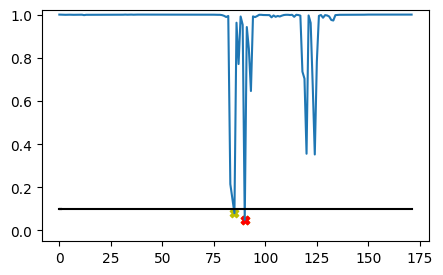

--------------------------------------------------------------------------------
Sequence A0A352W471 (i=13) with len=243:
RAW pred: 1.0 (168, 216), Overall MIN pred: 0.0060043334960937 (190, 200)

MSRHTFYLPPEFFRSGKIIISGQDAFHISRVLRLKTGSSLHGITYDRRRLEMQIERTGKEIICRITGEETIKQQKKFFISLALSCPRPAVLDSLVPKLAELGCDLVQPLVTERCFSPSLAKFASGRYDRIAAQAVKHSGRTDPFLIKNPVALNDFLNSTGPEYPGWNKFFPYEGETENSLARSLEQTGNKAVFVIGPEGGFSCAEADKIKQAGFIPVSLGSNILKVETAALFALISFINRQCS (190, 200)

MSRHTFYLPPEFFRSGKIIISGQDAFHISRVLRLKTGSSLHGITYDRRRLEMQIERTGKEIICRITGEETIKQQKKFFISLALSCPRPAVLDSLVPKLAELGCDLVQPLVTERCFSPSLAKFASGRYDRIAAQAVKHSGRTDPFLIKNPVALNDFLNSTGPEYPGWNKFFPYEGETENSLARSLEQTGNKAVFVIGPEGGFSCAEADKIKQAGFIPVSLGSNILKVETAALFALISFINRQCS (168, 178)
MSRHTFYLPPEFFRSGKIIISGQDAFHISRVLRLKTGSSLHGITYDRRRLEMQIERTGKEIICRITGEETIKQQKKFFISLALSCPRPAVLDSLVPKLAELGCDLVQPLVTERCFSPSLAKFASGRYDRIAAQAVKHSGRTDPFLIKNPVALNDFLNSTGPEYPGWNKFFPYEGETENSLARSLEQTGNKAVFVIGPEGGFSCAEADKIKQAGFIPVSLGSNILKVETAALFALISFINRQCS (190, 202)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2

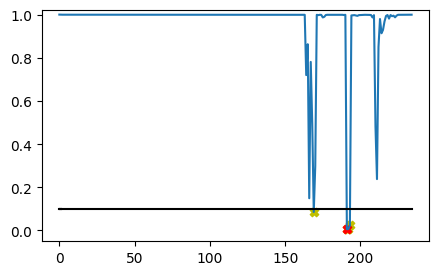

--------------------------------------------------------------------------------
Sequence A0A1Y5FQF1 (i=14) with len=261:
RAW pred: 1.0 (185, 226), Overall MIN pred: 0.0022907257080078 (204, 214)

MSSSSGMQWVYGLHAVQALLKTDAERVKELRLQRGRKDQRQQKIQALADREDIPWLWATRKELDALLASAAEEGEELNHQGVAALCTAGAVQDEAFLLNLLGELQEPALLLVLDEVTDPHNMGACLRTADAAGVQAIVTTKDRSVGITPVVRKVASGAADSVPLVVVTNLSRTLNKLKQEGLWIIGTDGEAQADVYATDFTVPMALVMGAEGKGLRRLTKETCDSLVKLPMAGTVSSLNVSVAAGVCLFEVVRQRQGSHGG (204, 214)

MSSSSGMQWVYGLHAVQALLKTDAERVKELRLQRGRKDQRQQKIQALADREDIPWLWATRKELDALLASAAEEGEELNHQGVAALCTAGAVQDEAFLLNLLGELQEPALLLVLDEVTDPHNMGACLRTADAAGVQAIVTTKDRSVGITPVVRKVASGAADSVPLVVVTNLSRTLNKLKQEGLWIIGTDGEAQADVYATDFTVPMALVMGAEGKGLRRLTKETCDSLVKLPMAGTVSSLNVSVAAGVCLFEVVRQRQGSHGG (202, 215)
MSSSSGMQWVYGLHAVQALLKTDAERVKELRLQRGRKDQRQQKIQALADREDIPWLWATRKELDALLASAAEEGEELNHQGVAALCTAGAVQDEAFLLNLLGELQEPALLLVLDEVTDPHNMGACLRTADAAGVQAIVTTKDRSVGITPVVRKVASGAADSVPLVVVTNLSRTLNKLKQEGLWIIGTDGEAQADVYATDFTVPMALVMGAEGKGLRRLTKETCDSLVKLPMAGTVSSLNVSVAAGVCLFEVVRQRQ

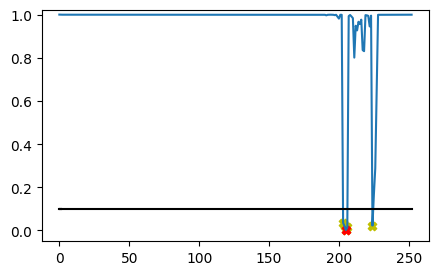

--------------------------------------------------------------------------------
Sequence A0A7W4JRM5 (i=15) with len=268:
RAW pred: 1.0 (94, 148), Overall MIN pred: 0.0203857421875 (134, 144)

MEARMTGRDGGADIAPIGNSPVVILVRPQMAENIGTTARAMANGGLFHLRLVAPRDGWPQERAWRSASGADRILEAATVHDSVDDAIADLHHVLATCPRPRHIVKTVLTARGGAAELRQASLRGMRTGLLFGPERAGLDNEDMARADALIRYPLNPAFMSLNLSQAVMIMAYEWWMAADATPPRTLMTNETHVATKGELDNFMRHLIDDLDECGFLRNEQKRAGMVRNLRHFFTRGEVTEQELRTLHGVVTELARGRRSRQAKEQPQG (134, 144)

MEARMTGRDGGADIAPIGNSPVVILVRPQMAENIGTTARAMANGGLFHLRLVAPRDGWPQERAWRSASGADRILEAATVHDSVDDAIADLHHVLATCPRPRHIVKTVLTARGGAAELRQASLRGMRTGLLFGPERAGLDNEDMARADALIRYPLNPAFMSLNLSQAVMIMAYEWWMAADATPPRTLMTNETHVATKGELDNFMRHLIDDLDECGFLRNEQKRAGMVRNLRHFFTRGEVTEQELRTLHGVVTELARGRRSRQAKEQPQG (133, 144)
MEARMTGRDGGADIAPIGNSPVVILVRPQMAENIGTTARAMANGGLFHLRLVAPRDGWPQERAWRSASGADRILEAATVHDSVDDAIADLHHVLATCPRPRHIVKTVLTARGGAAELRQASLRGMRTGLLFGPERAGLDNEDMARADALIRYPLNPAFMSLNLSQAVMIMAYEWWMAADATPPRTLMTNETHVATKGELDNFMRHLIDDLDECGFLRNEQKRAGMVRNLRHFFTRGEVTEQELRTL

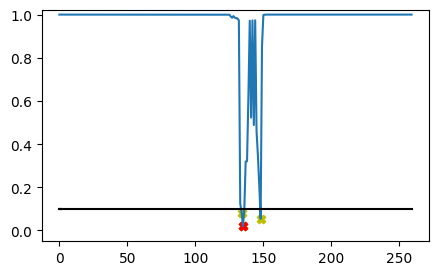

--------------------------------------------------------------------------------
Sequence A0A4P6E9Q8 (i=16) with len=332:
RAW pred: 1.0 (255, 297), Overall MIN pred: 0.0031166076660156 (275, 285)

MAKPKRAGNTGNSKKKGPQKGTGGHGRKALEGKGPTPKAADRSWHVAGKRKAAQDRYVAAGGKPKAKPVDMNRAARAKKNDDTETVTGRNSVLEALRAKIPATALYIAQRVEMDDRVKEMLAIATHREIPVLEVTRPELDRMSGIDGVHQGVALKVPPYTYAHPQDLLEQIFDTGATPLLVALDGVTDPRNLGAIIRSTAAFGGQGVIIPQRRSAGVTSTAWKTSAGAAARVPVAMASNLTSTLKEFKKQGVFVLGLDGAGDVQLPKLELADRPVLIVCGSEGKGLSRLVTETCDQIVSIPIEAATESLNAGIATSVALYQVATMRAAQQGE (275, 285)

MAKPKRAGNTGNSKKKGPQKGTGGHGRKALEGKGPTPKAADRSWHVAGKRKAAQDRYVAAGGKPKAKPVDMNRAARAKKNDDTETVTGRNSVLEALRAKIPATALYIAQRVEMDDRVKEMLAIATHREIPVLEVTRPELDRMSGIDGVHQGVALKVPPYTYAHPQDLLEQIFDTGATPLLVALDGVTDPRNLGAIIRSTAAFGGQGVIIPQRRSAGVTSTAWKTSAGAAARVPVAMASNLTSTLKEFKKQGVFVLGLDGAGDVQLPKLELADRPVLIVCGSEGKGLSRLVTETCDQIVSIPIEAATESLNAGIATSVALYQVATMRAAQQGE (275, 286)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2381 vs. 0.2619
0.2381 vs. 0.2619


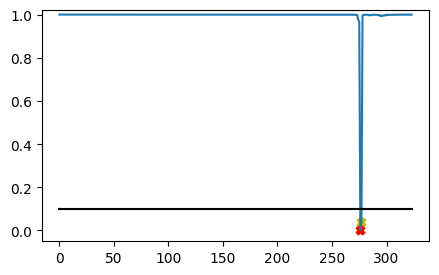

--------------------------------------------------------------------------------
Sequence D3P9G0 (i=17) with len=143:
RAW pred: 1.0 (61, 108), Overall MIN pred: 0.037628173828125 (59, 69)

MRIKIIIGAKITDRNLIELLKKYFKRLEVYHDIELIDFKSSGVESKDINKYKQFSRDCYLVGLDVEGKTMDSVTFAKKYLDNTFKDIAFLIGGADGLPNDLKKECNELFSLSKLTFCHEHALLVLAEQIYRGVMINKGHPYHK (59, 69)

MRIKIIIGAKITDRNLIELLKKYFKRLEVYHDIELIDFKSSGVESKDINKYKQFSRDCYLVGLDVEGKTMDSVTFAKKYLDNTFKDIAFLIGGADGLPNDLKKECNELFSLSKLTFCHEHALLVLAEQIYRGVMINKGHPYHK (59, 69)

MIN vs. sum EXTENDED
0.8 vs. 0.8
0.1702 vs. 0.1702
0.1633 vs. 0.1633


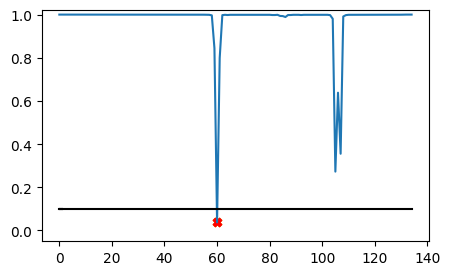

--------------------------------------------------------------------------------
Sequence A0A847VCX4 (i=18) with len=214:
RAW pred: 1.0 (82, 129), Overall MIN pred: 0.04718017578125 (110, 120)

MKFDIVTIFPEVVSTYTGSSILKRAQEKGLVEIEVHNLRDWALDKHRVVDDTPYGGGPGMIIKVEPVFNCLKDLKKDNSLVILTSPKGERLVQSKLKELSEKQNAHYIILCGHYEGFDQRIHDYLVDYEFSIGDYVLSGGELPALVLVDGVIRLIPGVLGNEDSLILETFTEGVVDYPQYTKPQQFNNWKVPDVLLSGDHQKIDKWREERLFKV (110, 120)

MKFDIVTIFPEVVSTYTGSSILKRAQEKGLVEIEVHNLRDWALDKHRVVDDTPYGGGPGMIIKVEPVFNCLKDLKKDNSLVILTSPKGERLVQSKLKELSEKQNAHYIILCGHYEGFDQRIHDYLVDYEFSIGDYVLSGGELPALVLVDGVIRLIPGVLGNEDSLILETFTEGVVDYPQYTKPQQFNNWKVPDVLLSGDHQKIDKWREERLFKV (110, 123)

MIN vs. sum EXTENDED
1.0 vs. 1.0
0.2128 vs. 0.2766
0.2128 vs. 0.2766


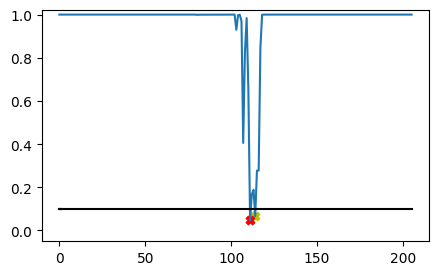

--------------------------------------------------------------------------------
Sequence A0A3B8R3M7 (i=19) with len=177:
RAW pred: 1.0 (101, 145), Overall MIN pred: 0.057891845703125 (142, 152)

MQKKTIFDLNRASLDDYRRRAKLPLTVVLDNVRSLNNIGSVFRTSDAFLVDRIMLCGITATPPSPEIHKTALGAEESVSWLHFDSTLDCIRRLKSEGYTVCALEQVKGSVDLRDFRPDQAGKYAIVAGHEVHGVDPAVVDAADICLEIPQFGTKHSLNVSVSTGITLWHFFTALMPR (142, 152)

MQKKTIFDLNRASLDDYRRRAKLPLTVVLDNVRSLNNIGSVFRTSDAFLVDRIMLCGITATPPSPEIHKTALGAEESVSWLHFDSTLDCIRRLKSEGYTVCALEQVKGSVDLRDFRPDQAGKYAIVAGHEVHGVDPAVVDAADICLEIPQFGTKHSLNVSVSTGITLWHFFTALMPR (142, 152)

MIN vs. sum EXTENDED
0.3 vs. 0.3
0.06818 vs. 0.06818
0.05882 vs. 0.05882


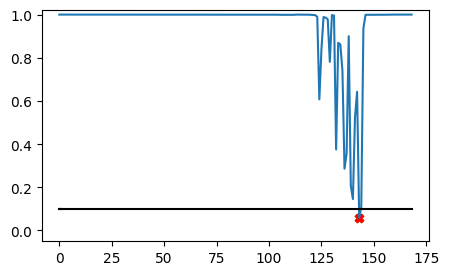

In [17]:
for i in df.index[:20]:
    visualise_seq(df, i)

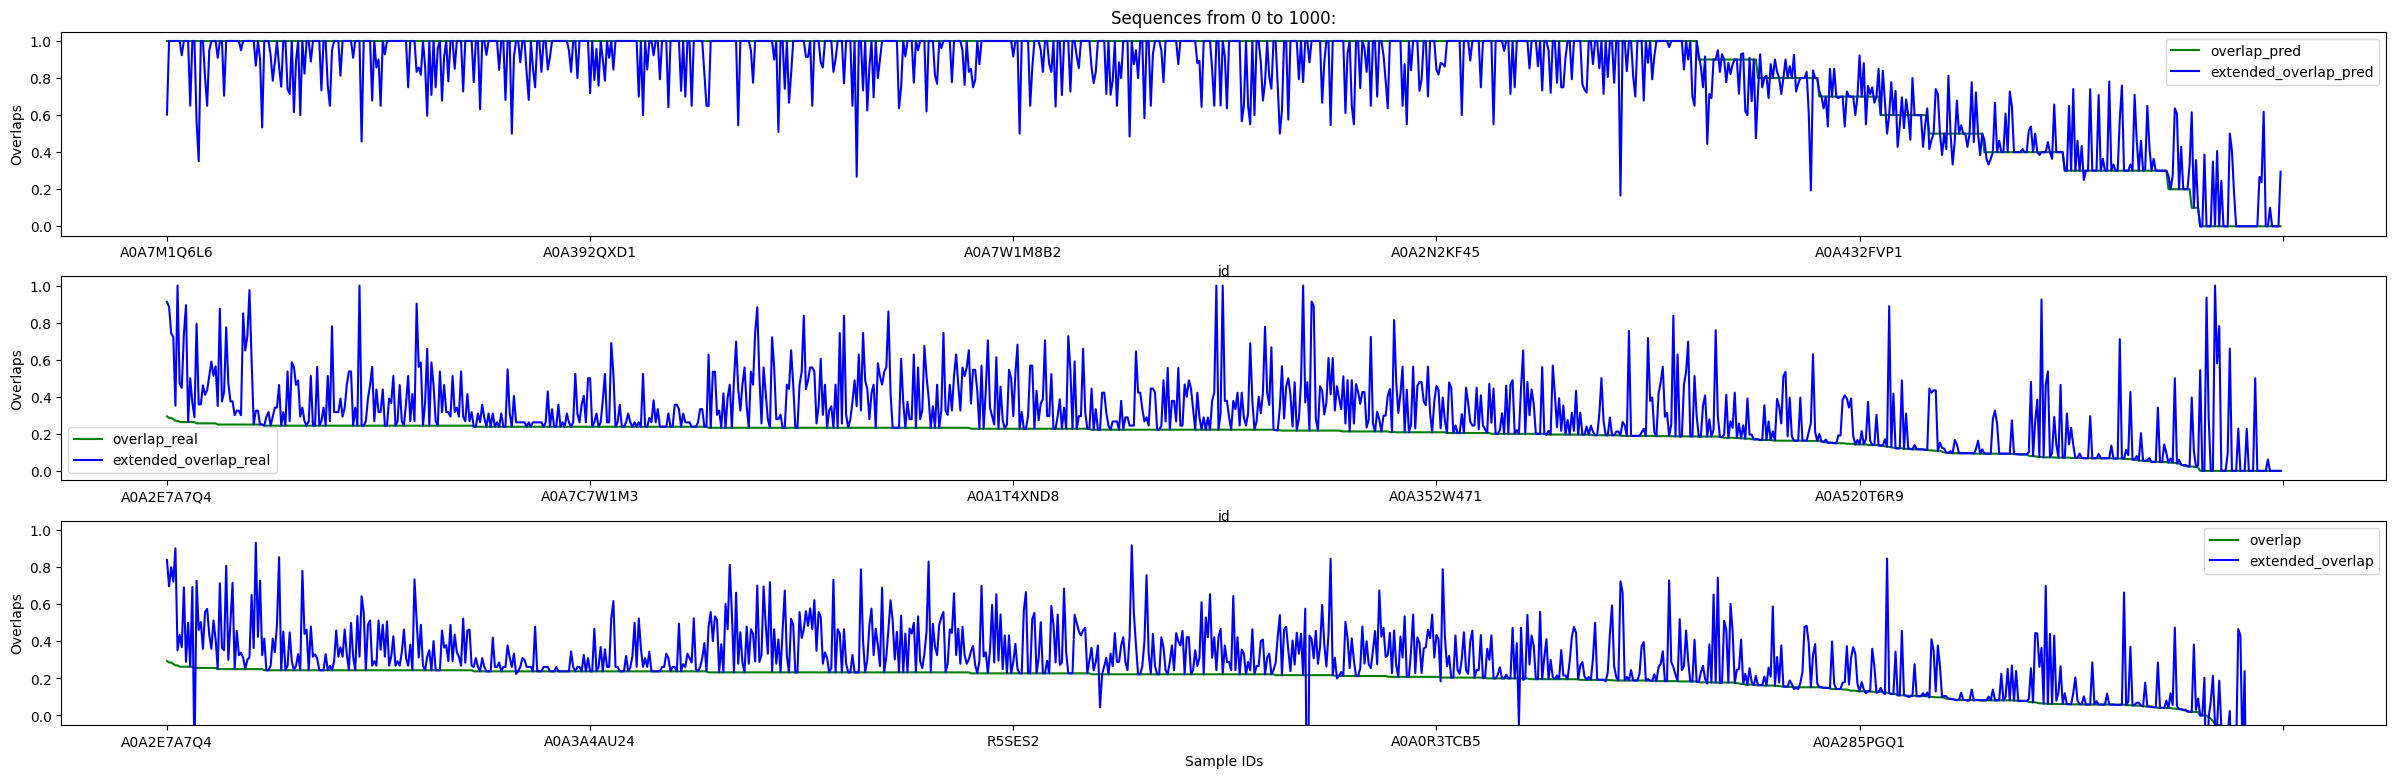

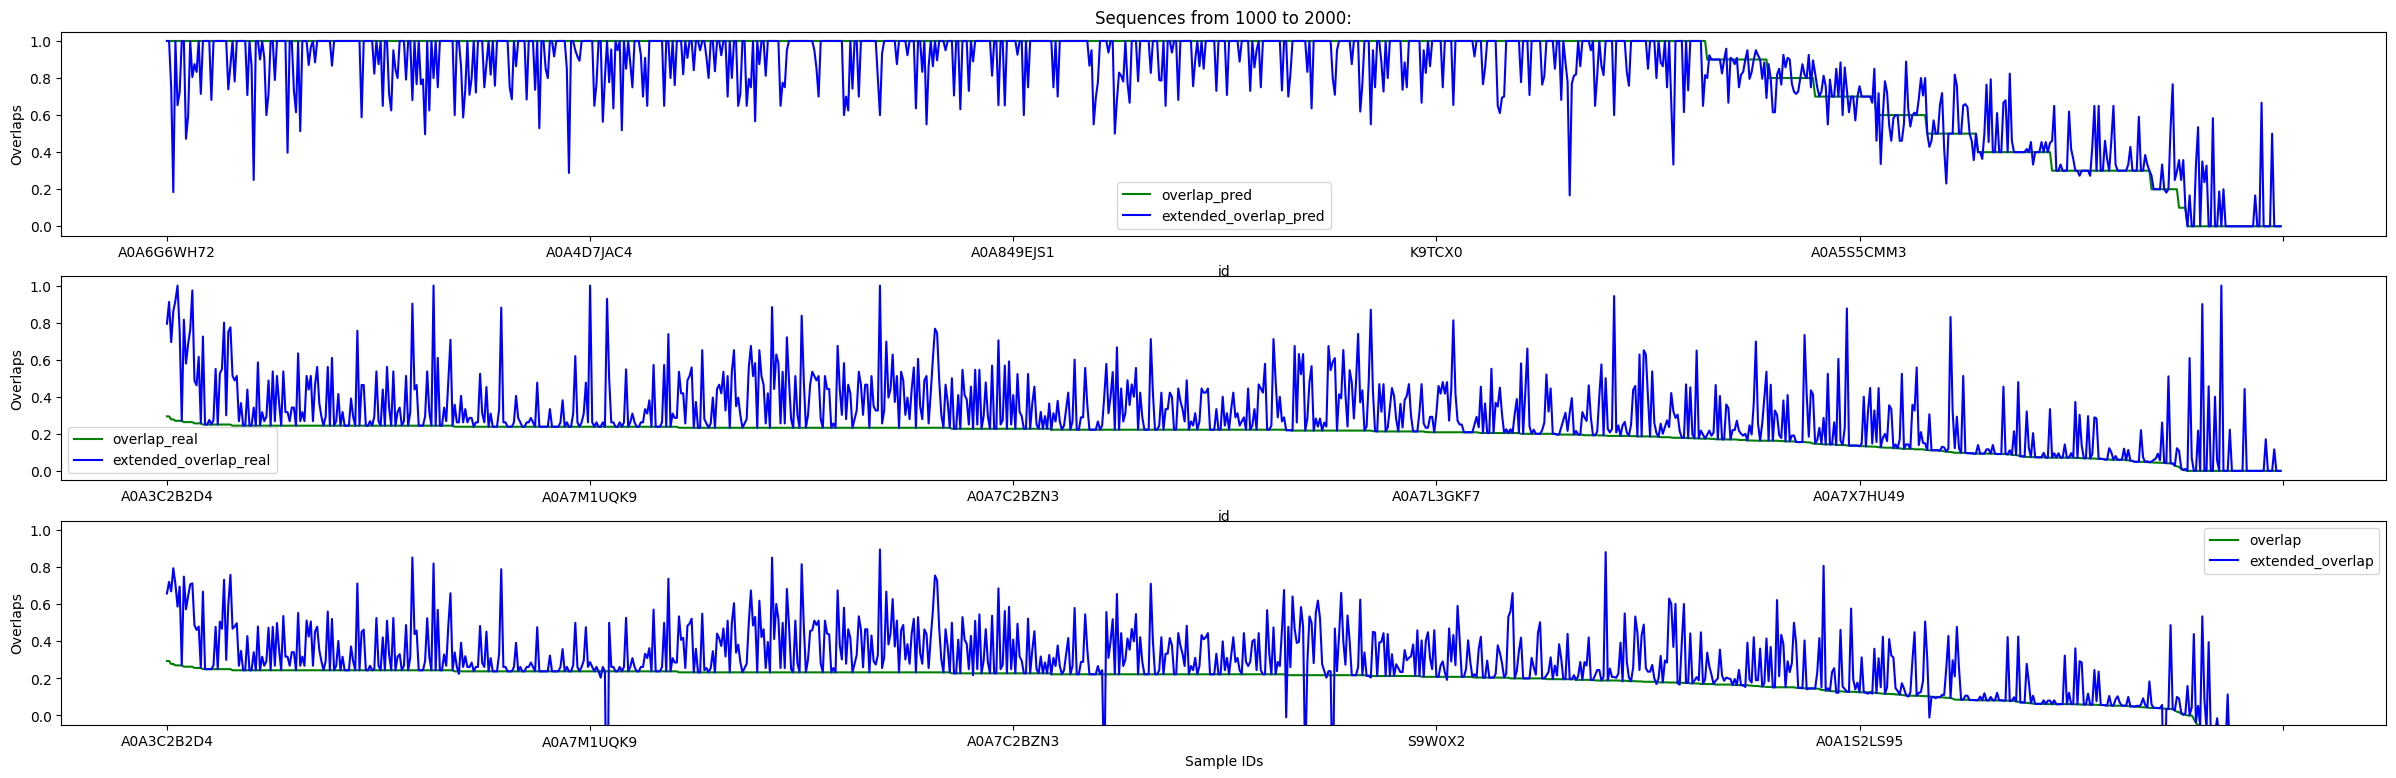

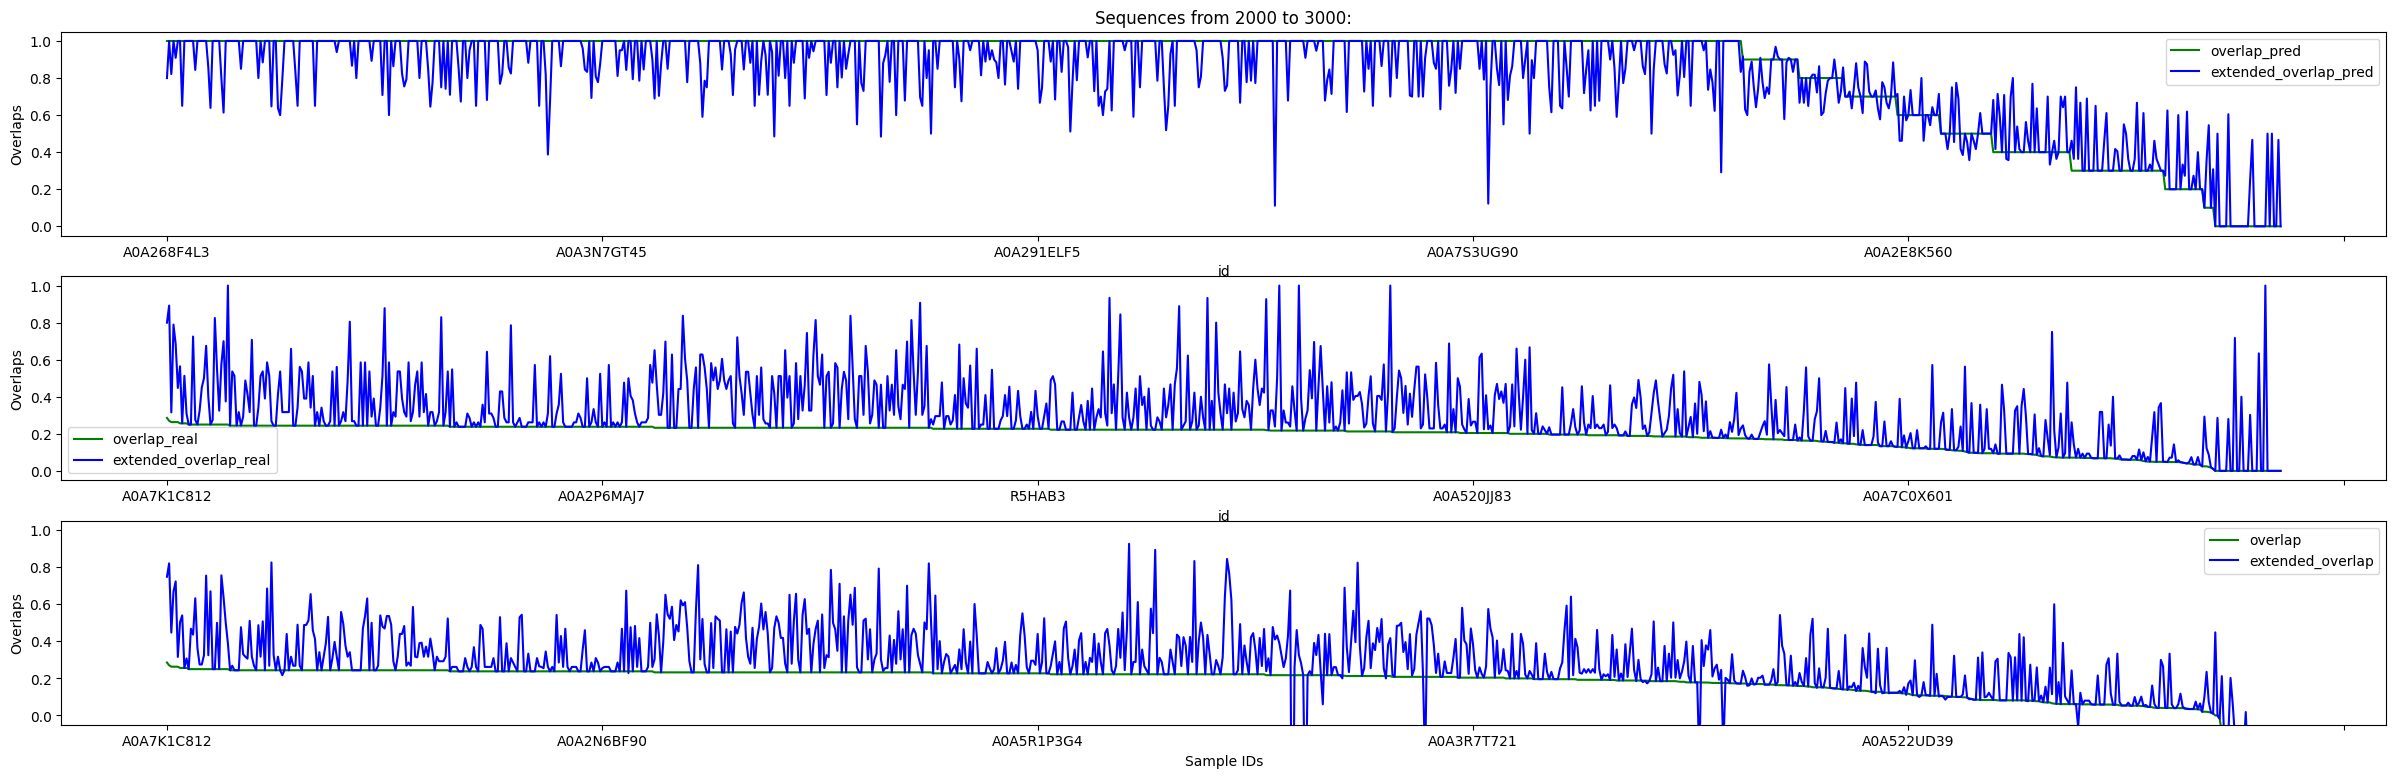

In [11]:
STEP = 1000

def visualise_difference(df, page_start, page_end, column1, column2, axes):
    df = df.iloc[page_start:page_end]
    df = df.sort_values(by=[column1], ascending=False)
    ax = df.plot(kind='line', x='id', y=column1, color='g', figsize=(30,9), ax=axes)
    ax.set_ylim([-0.05, 1.05])
    df.plot(kind='line', x='id',y=column2, color='b', ax=ax)
    ax.set_ylabel('Overlaps')
    return ax

for i in range(0, len(df), STEP):
    fig, axes = plt.subplots(nrows=3, ncols=1)
    ax = visualise_difference(df, i, i+STEP, 'overlap_pred', 'extended_overlap_pred', axes[0])
    ax.set_title(f'Sequences from {i} to {i+STEP}:')
    visualise_difference(df, i, i+STEP, 'overlap_real', 'extended_overlap_real', axes[1])
    ax = visualise_difference(df, i, i+STEP, 'overlap', 'extended_overlap', axes[2])
    ax.set_xlabel('Sample IDs')
    plt.show()
    print()

In [12]:
# df['extended_len'] = df.apply(lambda row: , axis=1)

In [13]:
stats = []

pred_mean = df['overlap_pred'].mean()
pred_med = df['overlap_pred'].median()
pred_max = df['overlap_pred'].max()
pred_min = df['overlap_pred'].min()

real_mean = df['overlap_real'].mean()
real_med = df['overlap_real'].median()
real_max = df['overlap_real'].max()
real_min = df['overlap_real'].min()

overlap_mean = df['overlap'].mean()
overlap_med = df['overlap'].median()
overlap_max = df['overlap'].max()
overlap_min = df['overlap'].min()

stats.append({'data': 'overall_min', 
              'pred_mean': pred_mean,
              'pred_med': pred_med,
              'pred_max': pred_max,
              'pred_min': pred_min,
              'real_mean': real_mean,
              'real_med': real_med,
              'real_max': real_max,
              'real_min': real_min,
              'overlap_mean': overlap_mean,
              'overlap_med': overlap_med,
              'overlap_max': overlap_max,
              'overlap_min': overlap_min})

In [14]:
pred_mean = df['extended_overlap_pred'].mean()
pred_med = df['extended_overlap_pred'].median()
pred_max = df['extended_overlap_pred'].max()
pred_min = df['extended_overlap_pred'].min()

real_mean = df['extended_overlap_real'].mean()
real_med = df['extended_overlap_real'].median()
real_max = df['extended_overlap_real'].max()
real_min = df['extended_overlap_real'].min()

overlap_mean = df['extended_overlap'].mean()
overlap_med = df['extended_overlap'].median()
overlap_max = df['extended_overlap'].max()
overlap_min = df['extended_overlap'].min()

stats.append({'data': 'extended', 
              'pred_mean': pred_mean,
              'pred_med': pred_med,
              'pred_max': pred_max,
              'pred_min': pred_min,
              'real_mean': real_mean,
              'real_med': real_med,
              'real_max': real_max,
              'real_min': real_min,
              'overlap_mean': overlap_mean,
              'overlap_med': overlap_med,
              'overlap_max': overlap_max,
              'overlap_min': overlap_min})

stats_df = pd.DataFrame(stats)
stats_df

,data,pred_mean,pred_med,pred_max,pred_min,real_mean,real_med,real_max,real_min,overlap_mean,overlap_med,overlap_max,overlap_min
0,overall_min,0.853937,1.000000,1.0,0.0,0.189711,0.222222,0.294118,0.0,0.175621,0.222222,0.294118,-0.954751
1,extended,0.807331,0.945437,1.0,0.0,0.312862,0.261905,1.000000,0.0,0.277605,0.261905,0.931395,-1.640737
